In [ ]:
!git clone https://github.com/shubhjhawar/college-data

Cloning into 'college-data'...
remote: Enumerating objects: 1898, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 1898 (delta 0), reused 3 (delta 0), pack-reused 1893
Receiving objects: 100% (1898/1898), 363.97 MiB | 33.43 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
import os
import cv2
import keras
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout

In [ ]:
categories = os.listdir('/content/college-data/food20dataset/test_set')

img_size = 256
def get_data(data_dir):
    data = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img)) #[...,::-1] #convert BGR to RGB format #optional
                img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) #reshape
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

train = get_data('/content/college-data/food20dataset/train_set')
val = get_data('/content/college-data/food20dataset/test_set')

x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (256, 256, 3), include_top = False, weights = "imagenet")
base_model.trainable = True
model1 = tf.keras.Sequential([base_model, tf.keras.layers.GlobalAveragePooling2D(), tf.keras.layers.Dropout(0.2),
         tf.keras.layers.Dense(128,activation='relu'), tf.keras.layers.Dense(10, activation="softmax")])
model1.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                           

In [ ]:
base_learning_rate = 0.0001
model1.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history1 = model1.fit(x_train,y_train,epochs = 150 , validation_data = (x_val, y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/150


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


22/22 [==============================] - 20s 296ms/step - loss: 1.8505 - accuracy: 0.4071 - val_loss: 1.4362 - val_accuracy: 0.5233
Epoch 2/150
22/22 [==============================] - 5s 222ms/step - loss: 0.6030 - accuracy: 0.9014 - val_loss: 1.0496 - val_accuracy: 0.6533
Epoch 3/150
22/22 [==============================] - 5s 221ms/step - loss: 0.2177 - accuracy: 0.9700 - val_loss: 1.0722 - val_accuracy: 0.6433
Epoch 4/150
22/22 [==============================] - 5s 222ms/step - loss: 0.0868 - accuracy: 0.9971 - val_loss: 1.0660 - val_accuracy: 0.6567
Epoch 5/150
22/22 [==============================] - 5s 223ms/step - loss: 0.0600 - accuracy: 0.9943 - val_loss: 1.0428 - val_accuracy: 0.6733
Epoch 6/150
22/22 [==============================] - 5s 220ms/step - loss: 0.0274 - accuracy: 1.0000 - val_loss: 1.0419 - val_accuracy: 0.6833
Epoch 7/150
22/22 [==============================] - 5s 220ms/step - loss: 0.0196 - accuracy: 1.0000 - val_loss: 0.9787 - val_accuracy: 0.7100
Epoch 8/15

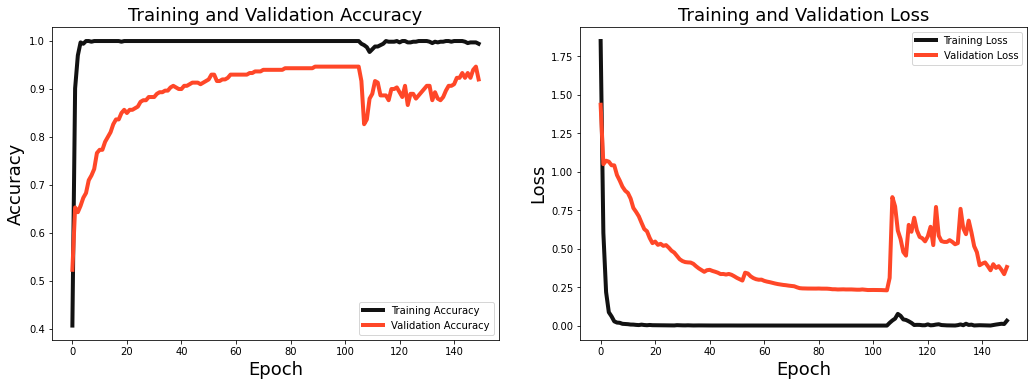

In [ ]:
epochs_range = range(150)
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

ax1.plot(epochs_range, acc1, label='Training Accuracy', c = '#121212', linewidth=4)
ax1.plot(epochs_range, val_acc1, label='Validation Accuracy', c='#ff4728', linewidth=4)

ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)


ax2.plot(epochs_range, loss1, label='Training Loss',c = '#121212', linewidth=4)
ax2.plot(epochs_range, val_loss1, label='Validation Loss', c='#ff4728', linewidth=4)

ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
plt.show()

In [ ]:
predictions = model1.predict(x_val)
classes_x=np.argmax(predictions,axis=1)
predictions = predictions.reshape(1,-1)[0]
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_val, classes_x, target_names = categories))

              precision    recall  f1-score   support

      dhokla       0.91      1.00      0.95        30
    vada pav       1.00      1.00      1.00        30
  butternaan       0.90      0.93      0.92        30
   paniyaram       0.94      0.97      0.95        30
        idly       0.96      0.80      0.87        30
       poori       0.89      0.83      0.86        30
   meduvadai       0.97      0.97      0.97        30
 gulab jamun       0.82      0.93      0.87        30
      samosa       0.96      0.87      0.91        30
        dosa       0.87      0.90      0.89        30

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [ ]:
model1.save('food.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


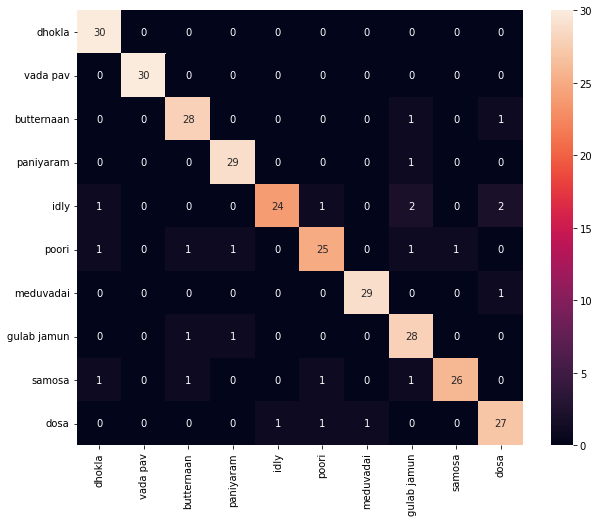

In [ ]:
cm1 = confusion_matrix(y_val, classes_x)
df_cm = pd.DataFrame(cm1, index = [i for i in categories], columns = [i for i in categories])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)

In [ ]:
def solution(prediction):
  nutri_val = [#Name, Calories,Protein(g),Carbohydrates(g),Fats(g),Fibre(g)
               ['Dhokla',152,5.7,16,7.4,2.5],
               ['Vada Pav',263,7.5,37,9.5,3.8],
               ['Idly',58,1.6,12,0.4,0.5],
               ['Paniyaram',18,0.4,1.5,1.1,0.3],
               ['Meduvadai',135,4.4,11,8.4,2],
               ['Poori',141,2.3,12,9.8,1.8],
               ['Butter naan',313,8.7,45,11,2],
               ['Gulab Jamun',149,1.9,20,7.3,0.1],
               ['Samosa',261,3.5,24,17,2.1],
               ['Dosa',168,3.9,29,3.7,0.9],

  ]
  print('This food item is',nutri_val[prediction][0])
  print('It has',nutri_val[prediction][1],'Calories, ',nutri_val[prediction][2], 'gm Protein, ',nutri_val[prediction][3],'gm Carbohydrates , ',
        nutri_val[prediction][4],'gm Fats and ',nutri_val[prediction][5],'gm Fibre')



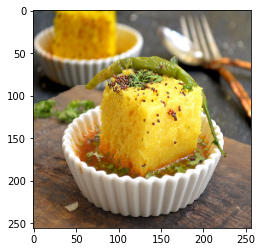

0
This food item is Dhokla
It has 152 Calories,  5.7 gm Protein,  16 gm Carbohydrates ,  7.4 gm Fats and  2.5 gm Fibre


In [ ]:
path='/content/college-data/test3'

img_size=256
def picture(path):
    data=[]
    count=0
    for img in os.listdir(path):
        # img_arr = cv2.imread(os.path.join(path, img))
        img_arr = cv2.imread(os.path.join(path, img))
        # plt.imshow(img_arr)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
        resized_arr = cv2.resize(img_arr, (256, 256))
        plt.imshow(resized_arr)
        plt.show()

        data.append(resized_arr)
        # print(data)
        count+=1
        return np.array(data)
        if count>1:
          break


train = picture(path)
# print(train)
x_train=[]
for feature in train:
  x_train.append(feature)

x_train = np.array(x_train) / 255
x_train.reshape(-1, img_size, img_size, 1)
# print(x_train.shape)
pre = model1.predict(x_train)
prediction=int(np.argmax(pre,axis=1))
print(prediction)
solution(prediction)